In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.metrics import f1_score, ConfusionMatrixDisplay,confusion_matrix
from catboost import CatBoostClassifier

In [20]:
df = pd.read_csv('../data/raw/insurance_dataset.csv')
df = df.drop(axis = 1, labels=['ID']) #Deanonymization


sports_car_df = df[df['VEHICLE_TYPE'] == 'sports car']
sedan_car_df = df [df['VEHICLE_TYPE'] == 'sedan']

In [30]:
y = ['CLAIM?']
new_categorical = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'VEHICLE_YEAR', 'INCOME', 'VEHICLE_TYPE', 'CLIENT LOCATION']
old_categorical = ['MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', ]
drop = ['ID']
numerical = ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'SPEEDING_VIOLATIONS','PAST_ACCIDENTS', 'DUIS' ]

## Univariate Analysis

In [55]:
df['CLIENT LOCATION'] = df['CLIENT LOCATION'].astype(str)

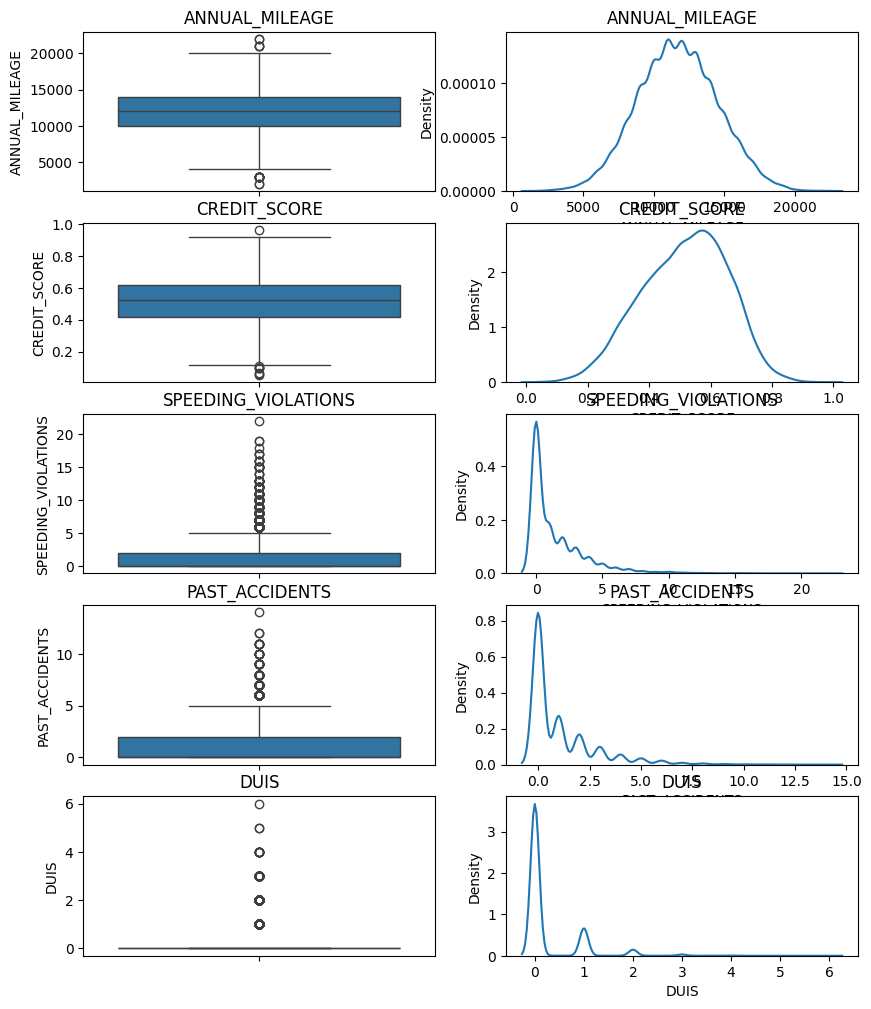

In [5]:
#Checking distribution of numerical variable

fig,ax = plt.subplots(len(numerical), 2, figsize = (10,12))
count = 0

for col in numerical:
    sns.boxplot(df[col], ax=ax[count][0]).set(title= col)
    sns.kdeplot(df[col], ax=ax[count][1]).set(title=col)
    df[col].fillna(value = 0, inplace= True)
    count += 1

In [23]:
df.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'CLIENT LOCATION', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'CLAIM?'],
      dtype='object')

In [34]:
import seaborn.objects as so

In [56]:
def show_distribution(df:pd.DataFrame, interest = "CLAIM?"):
   percent = {}

   assert interest in df.columns.to_list()
   for x in df[interest].unique():
      percent[x] = (len(df[df[interest] == x])/len(df[interest])) * 100 
   print(percent)

   plt.bar(percent.keys(), percent.values())
   plt.title(f"{interest} distribution")
   plt.show()
   #sns.barplot(x = percent.keys(), y = percent.values())

{'65+': 19.977228030224616, '16-25': 20.20494772797847, '26-39': 30.514439499016667, '40-64': 29.303384742780253}


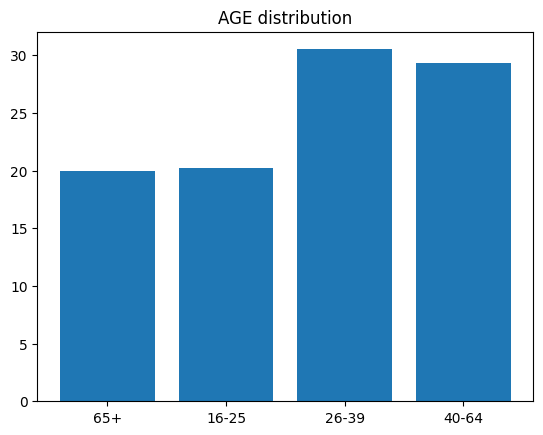

{'female': 50.160438877962946, 'male': 49.839561122037054}


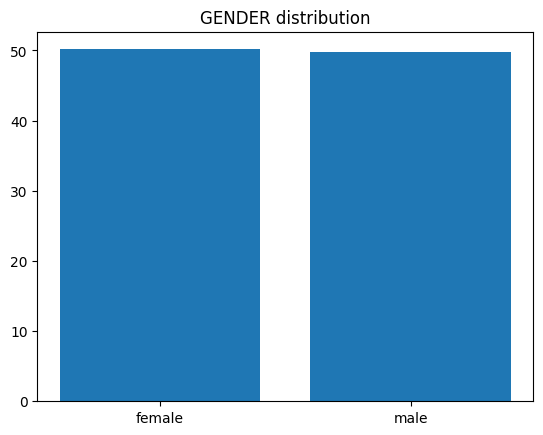

{'0-9y': 35.234447779732946, '10-19y': 33.01935617430908, '20-29y': 21.167580995756133, '30y+': 10.578615050201842}


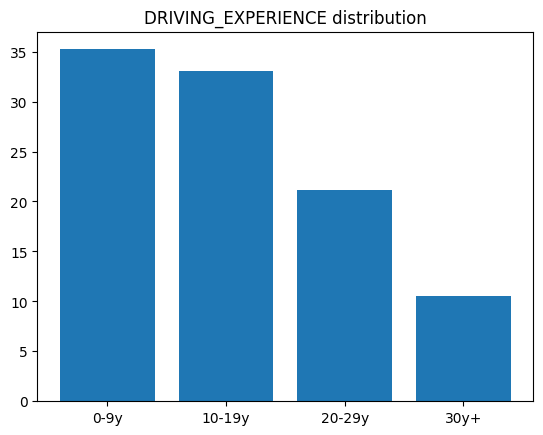

{'high school': 41.662353793603145, 'none': 19.076700134561637, 'university': 39.260946071835214}


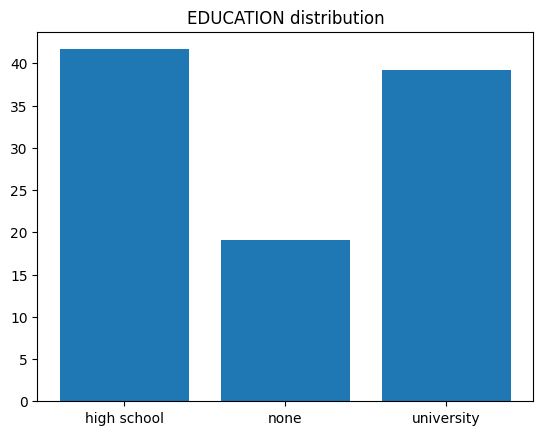

{'after 2015': 30.307421591967703, 'before 2015': 69.69257840803229}


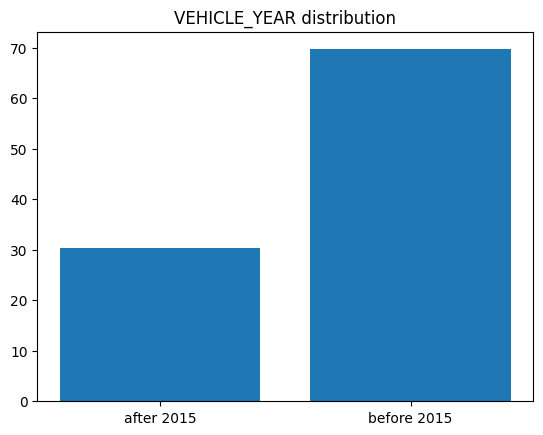

{'upper class': 43.411655108166855, 'poverty': 18.19687402960356, 'working class': 17.006521064072043, 'middle class': 21.38494979815754}


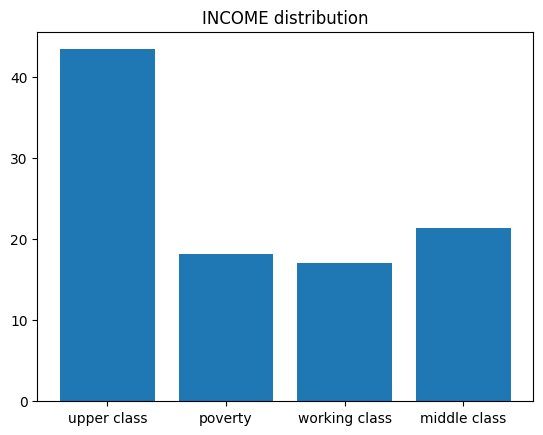

{'sedan': 95.16613187040679, 'sports car': 4.83386812959321}


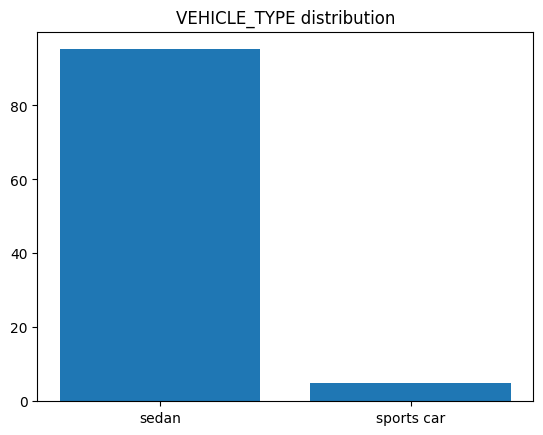

{'10238': 69.44415691957354, '32765': 24.47986750853949, '92101': 4.875271711003002, '21217': 1.2007038608839664}


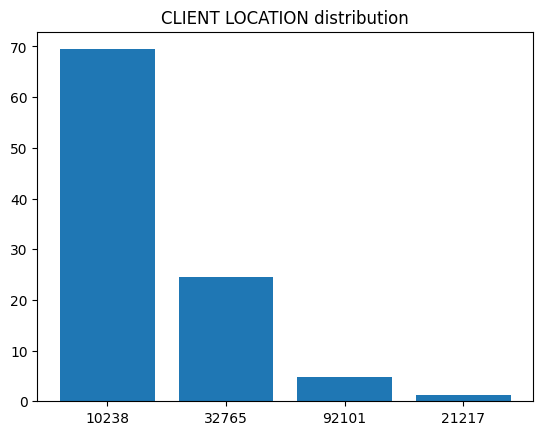

In [57]:
for c in new_categorical:
   show_distribution(df, c)

## Bivariate Analysis of claim against other data points

### Age

In [120]:
def compare_two_columns(independent = "CLAIM?", dependent= "AGE"):
    g = sns.FacetGrid(df, col = independent, height= 4, sharey= True)
    g.map(sns.histplot, dependent)

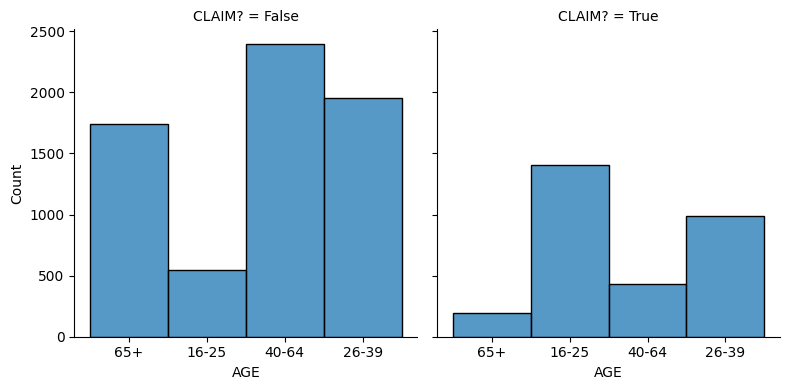

In [121]:
compare_two_columns(independent="CLAIM?", dependent="AGE")

Observations 

    - Age group 16-25+ have the highest claims of the age groups while age group 65 has the lowest claims 

### Driving Experience

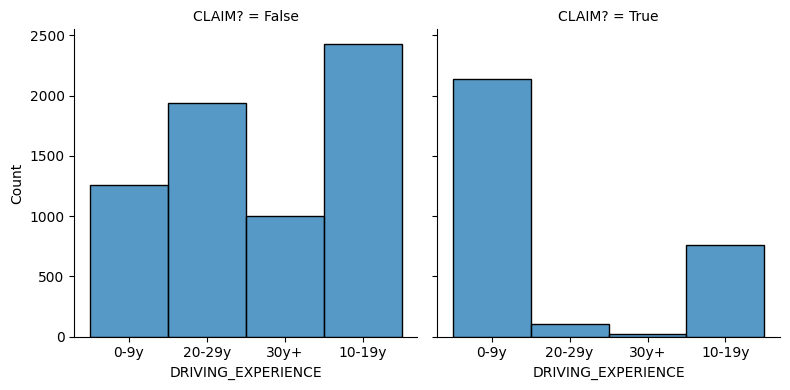

In [122]:
compare_two_columns(independent="CLAIM?", dependent="DRIVING_EXPERIENCE")

Observations:

    - There are significantly higher claims from drivers between 0 and 9 years experience.

    - and less claims from drivers with 30+ years experience

### Speeding Violations

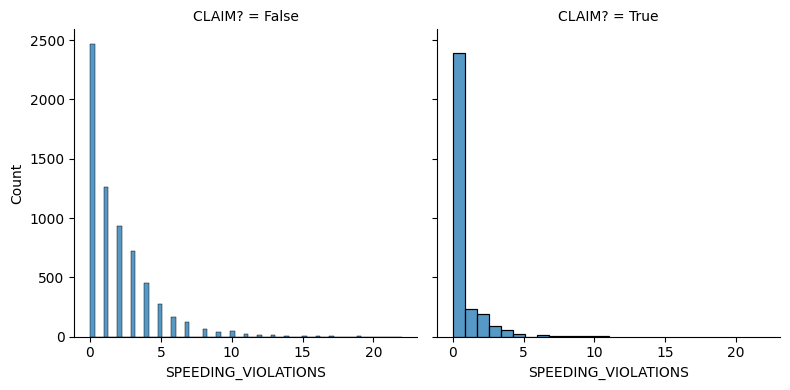

In [116]:
compare_two_columns(independent="CLAIM?", dependent="SPEEDING_VIOLATIONS")

### Client Location

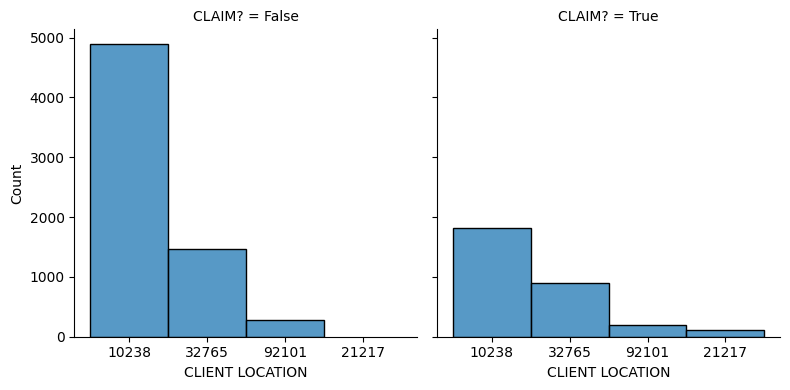

In [125]:
compare_two_columns(independent="CLAIM?", dependent="CLIENT LOCATION")

### Vehicle Year

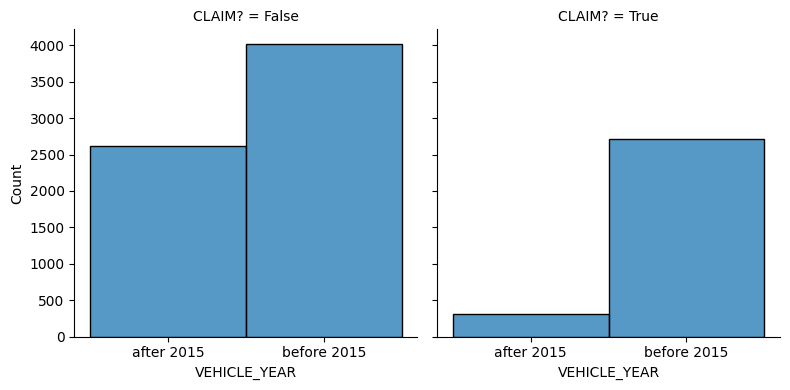

In [127]:
compare_two_columns(independent="CLAIM?", dependent="VEHICLE_YEAR")

### vehicle type

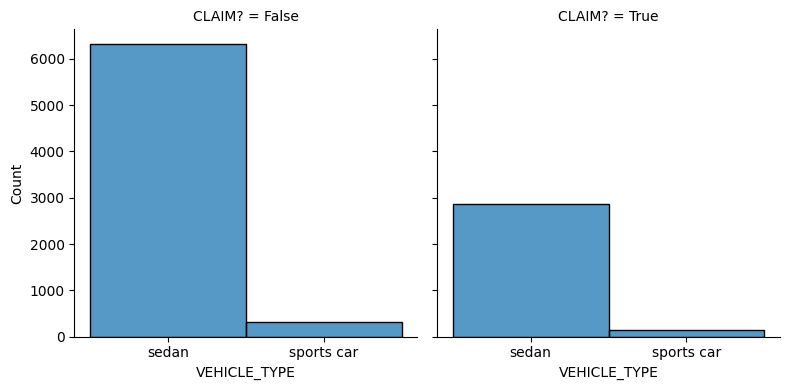

In [129]:
compare_two_columns(independent="CLAIM?", dependent="VEHICLE_TYPE")

Observations:
    
    - Sedan cars are disproportionately more than sports car which explains why they make more claims

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='Count'>

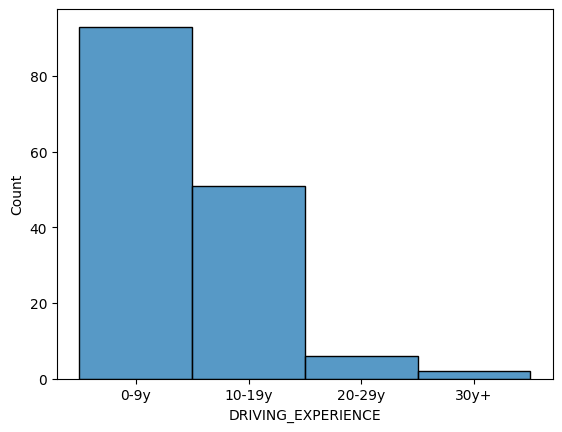

In [86]:
sports_car_df = df[df['VEHICLE_TYPE'] == 'sports car']
sns.histplot(x = sports_car_df[sports_car_df['CLAIM?'] == 1]['DRIVING_EXPERIENCE'])

#Trends consistent with overall data

### Marriage

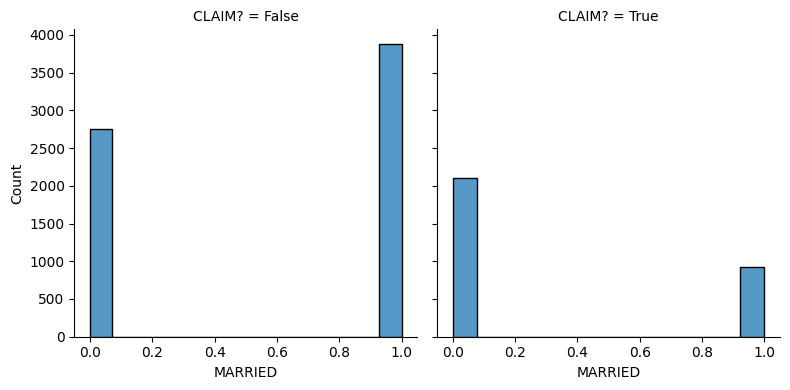

In [136]:
df['MARRIED'] = df['MARRIED'].astype(bool)
compare_two_columns(independent="CLAIM?", dependent="MARRIED")

Observations:

    - Married people make less insurance claims

### INCOME

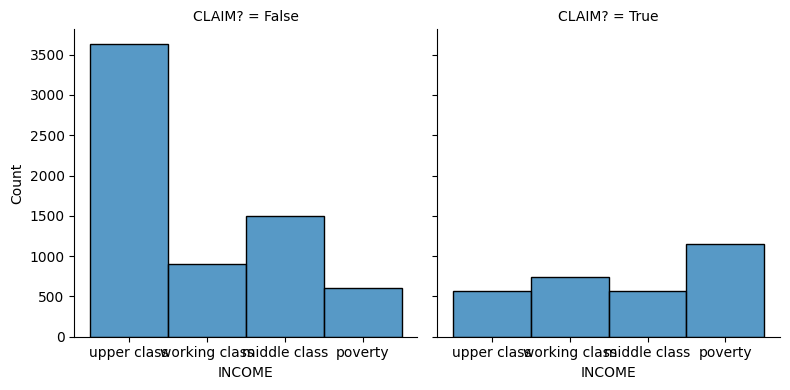

In [132]:
compare_two_columns(independent="CLAIM?", dependent="INCOME")

Observation:

    - Upper class makes the least claim
    - Poverty class makes the most claim followed by working class

### Education

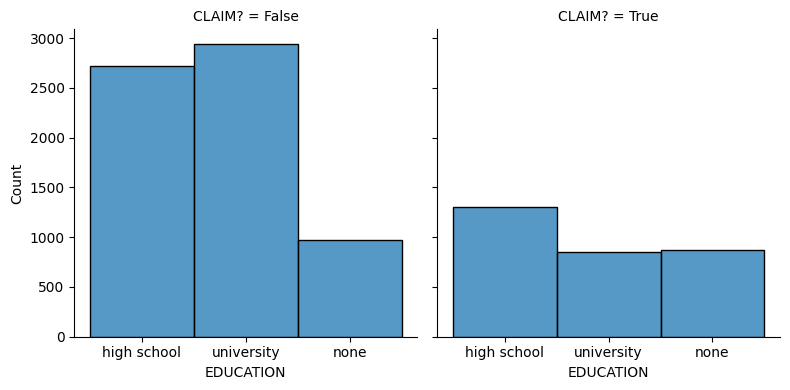

In [130]:
compare_two_columns(independent="CLAIM?", dependent="EDUCATION")

In [138]:
def compare_three_vars(independent = "CLAIM?", dependent= "AGE", dependent_2 = "EDUCATION"):
    g = sns.FacetGrid(df, col = independent, row = dependent_2, height= 4, sharey= True,sharex= False)
    g.map(sns.histplot, dependent)

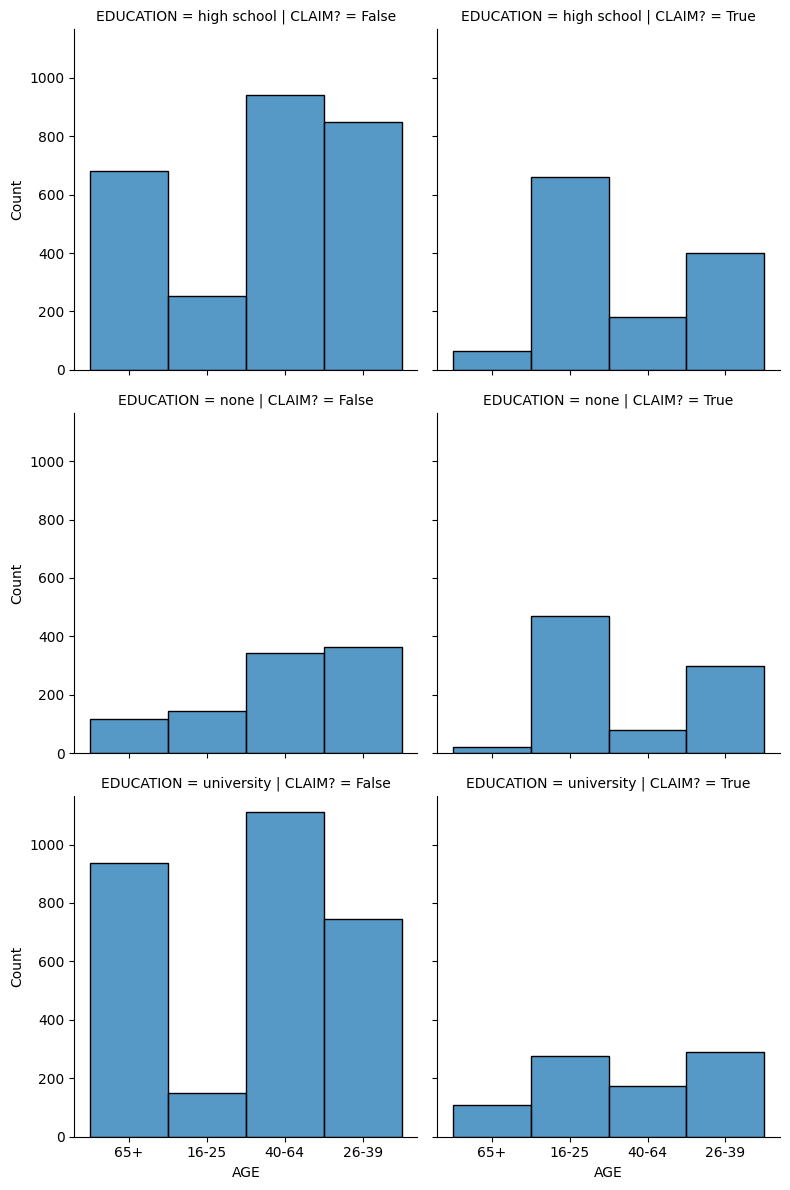

In [139]:
compare_three_vars()

Observation:

    - There's no clear separation in subcategories of education with claims

### GENDER

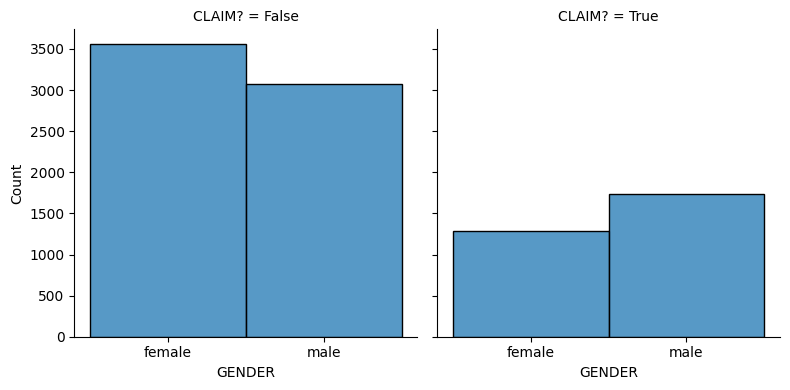

In [131]:
compare_two_columns(independent="CLAIM?", dependent="GENDER")

Observations:
 There is no clear separation of the effect of Gender on claims

## HYPOTHESES

1.   From the plot, there's an hypothesis that DRIVING EXPERIENCE is a predictor of a client making an insurance claim.

In [9]:
print(df['CLIENT LOCATION'].corr(df['CLAIM?'], method = 'pearson'))
print(df['CLIENT LOCATION'].corr(df['CLAIM?'], method = 'spearman'))

0.09925013220328771
0.12861834863550337
